In [2]:
!pip install plotly
!pip install fredapi > /dev/null

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('fivethirtyeight')
pd.set_option('max_columns', 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

## Gather the Api key from fred api website

In [9]:
from fredapi import Fred
fred_key = "10fa8dc23d9030cd8361912e66b7a398" #Make sure to update your one key

##  Create a fred object instance

In [11]:
fred = Fred(api_key=fred_key)
fred

## 2. Search for economic data

In [16]:
sp_search = fred.search('S&P', order_by="popularity")
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2023-10-24,2023-10-24,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2023-10-23,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-10-24 08:44:02-05:00,93,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2023-10-24,2023-10-24,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2023-07-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-09-26 08:11:02-05:00,88,"For more information regarding the index, plea..."
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2023-10-24,2023-10-24,ICE BofA US High Yield Index Effective Yield,1996-12-31,2023-10-23,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-10-24 08:44:06-05:00,83,This data represents the effective yield of th...
SP500,SP500,2023-10-24,2023-10-24,S&P 500,2013-10-24,2023-10-23,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-10-23 19:11:02-05:00,82,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2023-10-24,2023-10-24,Real Median Household Income in the United States,1984-01-01,2022-01-01,Annual,A,2021 CPI-U-RS Adjusted Dollars,2021 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2023-09-12 13:48:02-05:00,81,Household data are collected as of March. As ...


## 3. Pull raw data & plot

In [19]:
sp_500= fred.get_series(series_id='SP500')

<AxesSubplot:title={'center':'S&P 500'}>

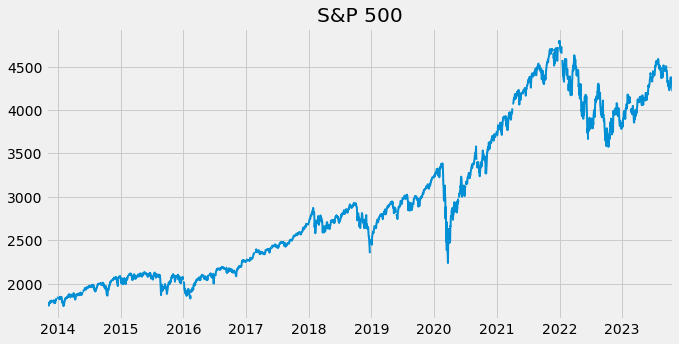

In [22]:
sp_500.plot(figsize=(10,5), title="S&P 500", lw=2)

## Pull and Join Unemployment Data Series

In [36]:
unemployment_series= fred.search('unemployment')
unemployment_series

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-10-24,2023-10-24,Unemployment Rate,1948-01-01,2023-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-10-06 07:46:02-05:00,93,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2023-10-24,2023-10-24,Unemployment Rate,1948-01-01,2023-09-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-10-06 07:45:02-05:00,55,The unemployment rate represents the number of...
UNEMPLOY,UNEMPLOY,2023-10-24,2023-10-24,Unemployment Level,1948-01-01,2023-09-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2023-10-06 07:46:04-05:00,69,The series comes from the 'Current Population ...
NROU,NROU,2023-10-24,2023-10-24,Noncyclical Rate of Unemployment,1949-01-01,2025-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2023-08-01 11:01:03-05:00,66,"Starting with the July, 2021 report: An Update..."
CCSA,CCSA,2023-10-24,2023-10-24,Continued Claims (Insured Unemployment),1967-01-07,2023-10-07,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2023-10-19 07:33:03-05:00,72,"Continued claims, also referred to as insured ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LAUCN470930000000003A,LAUCN470930000000003A,2023-10-24,2023-10-24,"Unemployment Rate in Knox County, TN",1990-01-01,2022-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2023-05-03 10:37:47-05:00,1,These data come from the Current Population Su...
LAUCN120570000000003A,LAUCN120570000000003A,2023-10-24,2023-10-24,"Unemployment Rate in Hillsborough County, FL",1990-01-01,2022-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2023-05-03 10:40:53-05:00,1,These data come from the Current Population Su...
LAUCN130570000000003A,LAUCN130570000000003A,2023-10-24,2023-10-24,"Unemployment Rate in Cherokee County, GA",1990-01-01,2022-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2023-05-03 10:41:06-05:00,1,These data come from the Current Population Su...


In [31]:
unrate= fred.get_series('UNRATE')
unrate


1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2023-05-01    3.7
2023-06-01    3.6
2023-07-01    3.5
2023-08-01    3.8
2023-09-01    3.8
Length: 909, dtype: float64

<AxesSubplot:>

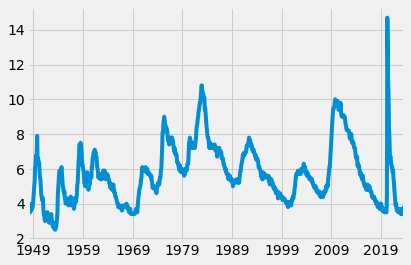

In [30]:
unrate.plot()

In [51]:
unemployment_df = unemployment_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"' )
unemployment_df = unemployment_df.loc[unemployment_df['title'].str.contains('Unemployment Rate')]
unemployment_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-10-24,2023-10-24,Unemployment Rate,1948-01-01,2023-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-10-06 07:46:02-05:00,93,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2023-10-24,2023-10-24,Unemployment Rate - Black or African American,1972-01-01,2023-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-10-06 07:46:05-05:00,65,The series comes from the 'Current Population ...
CAUR,CAUR,2023-10-24,2023-10-24,Unemployment Rate in California,1976-01-01,2023-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-10-24 08:53:02-05:00,60,None
M0892AUSM156SNBR,M0892AUSM156SNBR,2023-10-24,2023-10-24,Unemployment Rate for United States,1929-04-01,1942-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:26:06-05:00,53,Series Is Presented Here As Three Variables--(...
M0892BUSM156SNBR,M0892BUSM156SNBR,2023-10-24,2023-10-24,Unemployment Rate for United States,1940-01-01,1946-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:29:19-05:00,10,Series Is Presented Here As Three Variables--(...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CNEWUR,CNEWUR,2023-10-24,2023-10-24,Unemployment Rate in New England Census Division,1976-01-01,2023-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-10-24 08:52:11-05:00,3,None
LNS14000150,LNS14000150,2023-10-24,2023-10-24,Unemployment Rate - Married Men,1955-01-01,2023-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-10-06 07:47:48-05:00,3,The series comes from the 'Current Population ...
LRUN25TTUSM156S,LRUN25TTUSM156S,2023-10-24,2023-10-24,Unemployment Rate: Aged 25-54: All Persons for...,1960-01-01,2023-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-09-12 15:58:17-05:00,2,OECD Descriptor ID: LRUN25TT OECD unit ID: PC ...
